# Tirage aléatoire pondéré

**Objectifs :** Étant donnée une suite d'objets `population`, et une suite de poids correspondante `poids`, tirer au sort un élément de `population` avec une probabilité proportionnelle à son poids par rapport aux autres éléments.

⚠️⚠️⚠️ Dans ce cahier, on supposera dans un premier temps qu'on dispose uniquement de la fonction `random.randrange`.

Pour tester les résultats obtenus, on pourra faire des expériences répétées, et tracer des histogrammes avec `matplotlib`.

In [3]:
from random import randrange

In [4]:
import matplotlib.pyplot as plt

## Échauffement : tirage uniforme

Écrivons une fonction qui tire un élément au hasard dans la suite `population`, en utilisant uniquement `randrange`.

In [5]:
def choix_uniforme(population):
    indice = randrange(len(population))
    return population[indice]

In [10]:
choix_uniforme(['a', 'b', 'c'])

'b'

<BarContainer object of 3 artists>

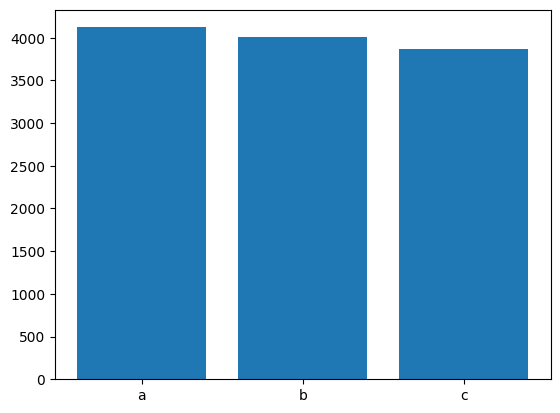

In [11]:
n = 12000
population = ['a', 'b', 'c']
resultats = {}
for _ in range(n):
    choix = choix_uniforme(population)
    resultats[choix] = resultats.get(choix, 0) + 1
plt.bar(resultats.keys(), resultats.values())

## Premier essai : dupliquer les éléments de la collection

Puisqu'on sait tirer uniformément dans une collection, on peut "tricher" en dupliquant chaque élément autant de fois que l'indique son poids, et tirer uniformément dans cette collection.

In [17]:
def choix_pondere_naif(population, poids):
    nouvelle_population = []
    for i in range(len(population)):
        nouvelle_population.extend([population[i]] * poids[i])
    return choix_uniforme(nouvelle_population)

In [26]:
choix_pondere_naif(['a', 'b', 'c'], [1, 3, 2])

'b'

<BarContainer object of 3 artists>

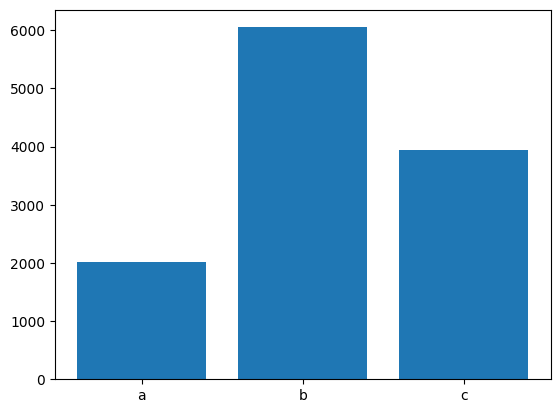

In [27]:
n = 12000
population = ['a', 'b', 'c']
poids = [1, 3, 2]
resultats = {}
for _ in range(n):
    choix = choix_pondere_naif(population, poids)
    resultats[choix] = resultats.get(choix, 0) + 1
plt.bar(resultats.keys(), resultats.values())

## Deuxième essai : avec calcul des poids cumulés

**Idée :** on calcule la somme des poids $S$, et on partitionne l'intervale des entiers de 0 à $S-1$ en `len(populations)` intervalles successifs correspondant à chacun des éléments de `population` : le premier intervalle contient `poids[0]` nombres, le suivant en contient `poids[1]`, etc. Ensuite, on fait un tirage uniforme d'un entier entre $0$ et $S-1$, et on associe l'entier tiré à l'intervalle correspondant. Par exemple, si on tire un entier entre 0 et 

⚠️ À la différence de l'implémentation précédente, on ne construit pas explicitement la liste des entiers ! On a par contre besoin de calculer la liste des poids cumulés :  
```python
[poids[0], 
 poids[0] + poids[1], 
 poids[0] + poids[1] + poids[2], ...]
```

In [28]:
def poids_cumules(poids):
    res = []
    cumul = 0
    for p in poids:
        cumul += p
        res.append(cumul)
    return res

In [29]:
poids_cumules([1, 3, 2])

[1, 4, 6]

Étant donné un entier `n` et une liste de poids cumulés `cumuls`, on veut maintenant pouvoir déterminer le plus grand indice `i` tel que `cumuls[i-1] <= n` (ou de manière équivalente, le plus petit indice `i` tel que `n < cumuls[i]`). C'est cet indice qui nous indiquera à quel intervalle appartient l'entier `n`  (et donc à quel élément de la population d'origine il correspond).

In [30]:
def trouve_intervalle(cumuls, n):
    # on aura en principe 0 <= poids < cumuls[-1]
    for i, cumul in enumerate(cumuls):
        if n < cumul:
            return i
    raise ValueError  # ne devrait pas se produire

In [35]:
trouve_intervalle([1, 4, 6], 6)

ValueError: 

**Pour aller plus loin :** pour optimiser cette fonction, on peut utiliser un algorithme de *dichotomie* plutôt qu'une recherche exhaustive (Cf. programme de NSI terminale / AP2).

On peut maintenant rassembler tous ces éléments pour obtenir un tirage pondéré un peu plus sobre.

In [36]:
def choix_pondere(population, poids):
    cumuls = poids_cumules(poids)
    alea = randrange(cumuls[len(cumuls)-1])
    indice = trouve_intervalle(cumuls, alea)
    return population[indice]

<BarContainer object of 3 artists>

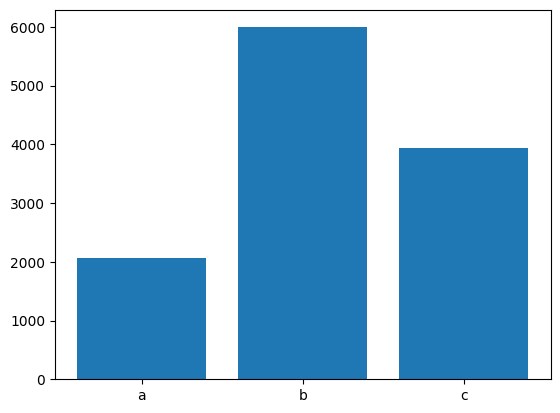

In [37]:
n = 12000
population = ['a', 'b', 'c']
poids = [1, 3, 2]
resultats = {e : 0 for e in population}
for _ in range(n):
    choix = choix_pondere(population, poids)
    resultats[choix] = resultats.get(choix, 0) + 1
plt.bar(resultats.keys(), resultats.values())

## Et dans la bibliothèque standard ?

In [38]:
population = ['a', 'b', 'c']
poids = [1, 3, 2]

Tirage uniforme :

In [39]:
from random import choice
choice(population)

'a'

Calcul des poids cumulés (facultatif) :

In [40]:
from itertools import accumulate
list(accumulate(poids))

[1, 4, 6]

Tirage pondéré :

In [45]:
from random import choices
choices(population, poids)

['c']

*Variante :*

In [46]:
cumuls = list(accumulate(poids))
choices(population, cum_weights=cumuls)  # plus rapide en principe

['b']

Vérification juste pour voir :

<BarContainer object of 3 artists>

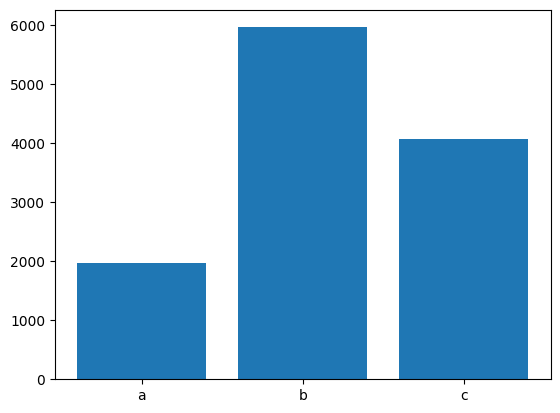

In [47]:
n = 12000
resultats = {e : 0 for e in population}
for _ in range(n):
    choix = choices(population, poids)[0]
    resultats[choix] += + 1
plt.bar(resultats.keys(), resultats.values())

## Un petit test

In [48]:
%timeit choix_pondere_naif(['a', 'b', 'c'], [32200, 77800, 21200])
%timeit choix_pondere(['a', 'b', 'c'], [32200, 77800, 21200])
%timeit choices(['a', 'b', 'c'], [32200, 77800, 21200])

568 μs ± 40.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.02 μs ± 103 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.23 μs ± 93.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
